<a href="https://colab.research.google.com/github/Dhanush0724/Bone-Fracture-Image-Analysis/blob/main/notebook0645937965.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libarires****

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import requests
from PIL import Image
import io

Image Dimensions

In [ ]:
#img = image.load_img('/kaggle/input/bone-fracture/data/train/fractured/10-rotated1-rotated1-rotated1.jpg')
#plt.imshow(img)
cv2.imread('/kaggle/input/bone-fracture/data/train/fractured/10-rotated1-rotated1-rotated1.jpg').shape

(224, 224, 3)

In [ ]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

Creation of training and validation datasets

In [ ]:
train_dataset =  train.flow_from_directory('/kaggle/input/bone-fracture/data/train',
                                           target_size = (200,200),
                                           batch_size = 3,
                                           class_mode = 'binary'
                                          )
validation_dataset =  validation.flow_from_directory('/kaggle/input/bone-fracture/data/val',
                                           target_size = (200,200),
                                           batch_size = 3,
                                           class_mode = 'binary'
                                          )


Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


Convential Neural Network (CNN) built using tensorflow keras

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy']
              )


model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs  = 30,
                     validation_data = validation_dataset
                     )

Adding the image path

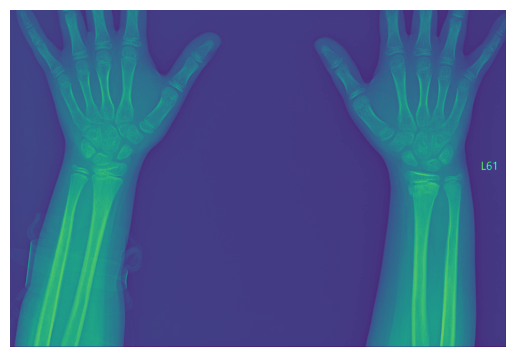

In [ ]:
image_paths = [
    "/kaggle/input/bone-fracture/data/train/fractured/10.jpg",
]


for path in image_paths:
    try:
        img = Image.open(path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Failed to load image from {path}: {e}")

In [ ]:
img = image.load_img('/kaggle/input/bone-fracture/data/train/fractured/10.jpg', target_size=(200, 200))
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)
X /= 255.
val = model.predict(X)
if val[0][0] <= 0.5:
    print("Fractured")
else:
    print("Not Fractured")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Fractured
